**COMENTARIO:** Para correr sin problema este módulo, se debe repasar la *Guia_Introductoria.ipynb*, que usaron en el primer corte.


# Modelo de Transporte Químico Regional WRF-Chem

**ANALISIS DE DATOS DE SALIDA DEL MODELO WRF-Chem**

Los archivos de salida del modelo WRF-Chem son archivos en tres dimensiones latitud (x), longitud (y), altura (z), y adicionalmente son datos que están en el tiempo (t). El formato de salida se llama NetCDF (Network Common Data Form), y es un formato de datos para almacenar de una manera eficiente gran cantidad de datos geograficos tridimensionales como variables meteorologicas (temperatura, velocidad y dirección del viento, presión atmosferica, topografia, etc.) que varian en el tiempo. 

Si quiere investigar más sobre los archivos NetCDF, dirijase a: https://climatedataguide.ucar.edu/climate-data-tools-and-analysis/netcdf-overview



**Acceder a los archivos de Google Drive**

Para poder usar los archivos de salida del modelo WRF que vamos analizar para este taller, primero deben subir los archivos en una carpeta que esté en el drive. Cuando se realizó la instalación de Colab, en el drive de cada uno se debió crear una carpeta que se llama **"*Colab Notebooks*"**, verifique que si tenga esta carpeta en su Drive.

Trate de mantener todos los Notebooks de los códigos de Colab y los archivos que vamos a usar dentro de esta carpeta.

Dentro de la carpeta **"*Colab Notebooks*"**, cree una carpeta que se llamé **"*Taller_WRF*"** y coloqué este código. Después y también en la carpeta **"*Taller_WRF*"** suba la carpeta **"*data*"** con los archivos para este taller.

Para poder acceder desde este código a los archivos de la carpeta **"*data*"** debe correr las siguientes líneas. Donde se creará un acceso directo a los archivos que están en Google Drive desde Colab. 

```
from google.colab import drive
drive.mount("/gdrive")
```

Después de correr las líneas, el computador arrojará un link al cual debe acceder, este link es para darle permiso de acceso al código de Colab. Este link lo dirigirá a una página para iniciar sesión en su gmail, y después que usted ingrese su usuario y contraseña, le indicará un código el cual debe pegar en el renglón del código que aparece justo después de correr las líneas de acceso, donde se pregunta por un código.

De esa manera, ya tendrá acceso a los archivos del drive. Sin embargo, cada vez que cierre y abra el código o cualquier código de Colab donde necesite acceso a los archivos ubicados en el drive, debe realizar este proceso. El acceso que se da por medio de este método es temporal.

La dirección de ubicación de su carpeta debe ser: 

**/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/**


In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


## ¿Cómo leer los archivos NetCDF de salida de WRF-Chem?

Recuerden que el lenguaje de programación que estamos usando para este taller es Python. Google colaboratory es la interfaz para programar en Python.


# **1. Primero**

Lo primero que debemos hacer es llamar a la librería que permite leer los archivos NetCDF. La librería se llama `netCDF4` y para llamar cualquier librería se usa la palabra `import`.

```
import netCDF4
```

Dentro de la librería `netCDF4` se encuentran muchas funciones. (E.g. Imaginemos que en nuestro computador, el lenguaje de programación es Excel. Excel a su vez tiene muchas funciones que podemos usar, aunque tienen funciones diferentes, mantienen unas características similares como la celda que queremos usar para hacer una multiplicación, etc). 

La librería `netCDF4` también tiene muchas funciones y la función que necesitamos para **leer** el archivo con los datos de salida del modelo se llama `Dataset`. 

Y para hacer un uso eficiente de la memoria del servidor que nos presta google, podemos únicamente llamar la función que requerimos de la librería de la siguiente manera:

```
from netCDF4 import Dataset
```

In [ ]:
!pip install netCDF4
from netCDF4 import Dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.9 MB/s eta 0:00:00


# **2.   Segundo**

Después de llamar la librería y función para leer el archivo NetCDF se debe proceder abrir el archivo. El archivo que contiene los datos de salida del modelo se llama **"*datos_taller_wrf_FIRE.nc*"** y debe estar ubicado en la carpeta **"*data*"** que a su vez debe estar en la carpeta **"*Taller_WRF*"**...

Si la ubicación es correcta, la línea para poder acceder al archivo es:

```
datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf.nc")
```

Los datos del archivo quedarán guardados en la variable **"datos"**.

Luego de correr estas líneas sin que arroje error, usted ya podra ver los datos que contiene el archivo.

In [ ]:
!pip install netCDF4
from netCDF4 import Dataset

datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf_FIRE.nc")



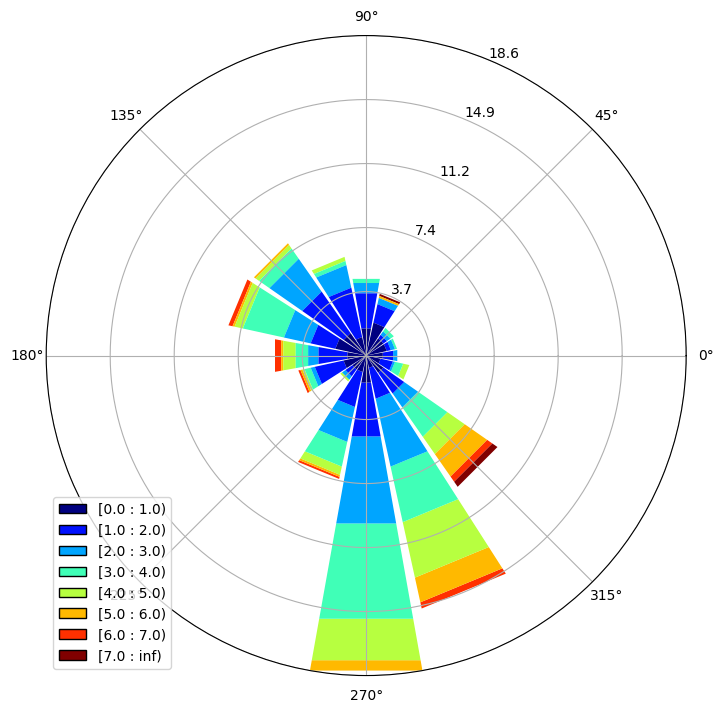

In [ ]:
from IPython.display import Image
Image('/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/RosaViento_FIRE.png')

# Archivos NetCDF

Los archivos NetCDF están organizados en variables y cada varaible tiene asociada las dimensiones en las que tiene los resultados de simulación.

Las variables que encontraran las pueden visualizar con el comando:

```
datos.variables.keys()
```

Este archivo cuenta con 15 variables, entre las variables con las que vamos a trabajar en el taller es Temperatura **'T2'**, concentraciones de Material Particulado fino PM2.5 **'PM2_5_DRY'** y las variables de dirección y velocidad del viento, que no son calculadadas directamente por el modelo, pero el modelo si arroja las componentes horizontales y verticales del viento y los angulos con respecto a la ubicación de la tierra, es por eso que se tienen otras variables como **'COSALPHA', 'P', 'SINALPHA', 'U', 'V'** que nos ayudaran a calcular la dirección y velocidad del viento en cada grilla para poder hacer el mapa de vientos y la rosa de vientos.


In [ ]:
# Linea de código
datos.variables.keys()

dict_keys(['COSALPHA', 'F', 'P', 'PM2_5_DRY', 'PSFC', 'SINALPHA', 'T2', 'Times', 'U', 'V', 'XLAT', 'XLAT_U', 'XLAT_V', 'XLONG', 'XLONG_U', 'XLONG_V', 'XTIME'])

Para ver las caracteristicas de cada variable se puede usar la líne de comando siguiente:

```
datos.variables['T2']
```

In [ ]:
# Si quiere ver las características de las otras variables como 'PM2_5_DRY' cambie la variable dentro del paréntesis cuadrado de la línea de comando.

datos.variables['PM2_5_DRY'][24,0,52,49]

masked_array(data=20.768318,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
datos.variables['PM2_5_DRY']

<class 'netCDF4._netCDF4.Variable'>
float32 PM2_5_DRY(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: pm2.5 aerosol dry mass
    units: ug m^-3
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (817, 1, 132, 132)
filling on, default _FillValue of 9.969209968386869e+36 used

**Los datos que puede observar de cada variable son:**

`<class 'netCDF4._netCDF4.Variable'> ` - Tipo de archivo netCDF versión 4

`float32 T2(Time, south_north, west_east)` - Esta línea es muy importante entenderla, pues muestra las dimensiones que tiene la variable, en este caso la variable **'T2'** tiene las dimesiones tiempo **Time**, latitud **south_north**, y longitud **west_east**.

```
FieldType: 104
MemoryOrder: XY
description: TEMP at 2 M
```
`units: K` - Las unidades de la variable. En el ejemplo de la variable temperatura nos dice que tiene unidades de grado Kelvin.

`stagger: `

`coordinates: XLONG XLAT XTIME`

`unlimited dimensions: Time`

`current shape = (817, 132, 132)` - La característica **Shape** también es muy importante dado que indica cuántas unidades de las dimensiones de la variable tiene. Los valores que aparecen están ubicados en el mismo orden que se muestra en la línea `float32 T2(Time, south_north, west_east)`, en el caso de la variable temperatura quiere decir que tiene 817 tiempos, 132 celdas en latitud y 132 celdas en longitud.

`filling on, default _FillValue of 9.969209968386869e+36 used`

In [ ]:
print("Dimensiones: ", datos.variables['T2'].dimensions)
print("Shape: ", datos.variables['T2'].shape)
print("Unidades: ", datos.variables['T2'].units)

Dimensiones:  ('Time', 'south_north', 'west_east')
Shape:  (817, 132, 132)
Unidades:  K


**Datos en el dominio 3 - D03**

Recuerde que los datos que se están usando son resultado del dominio 3 mostrado en la presentación del modelo. Esto quiere decir que el dominio está ubicado en el centro de Colombia, donde se encuentran datos de departamentos como Cundinamarca, Boyacá, y algunas partes de otros departamentos. Y la resolución espacial del dominio es de 132 celdas x 132 celdas y cada celda tiene una resolución de 3 km x 3 km.

Las dimensiones y el shape de cada variable permiten ubicar datos especificos de interes. Para los datos de los archivos resultantes del dominio 3 se esperará encontrar 132 valores en la dimensión latitud, 132 valores en la dimesión longitud y dependiento de las fechas de simulación un número relacionado con los pasos de tiempo, el periodo de simulación es 11 de marzo del 2020 a las 19:00 horas al 14 de abril del 2020 a las 19:00 horas, con registros cada hora Time shape = 817 horas.

Si quisieramos buscar los datos de temperatura en el centro de Bogotá, el 12 de marzo 2020 a las 19:00 horas, se debe buscar de la siguiente manera:

```
datos.variables['T2'][24,58,57]
```
Después de especificar la variable dentro del primer parentésis cuadrado **['T2']** se debe indicar la ubicación en tiempo, latitud y longitud del dato de interes dentro de parentésis cuadrado **[ ]** cada dimensión separada por una coma **(,)**.

En el ejemplo se indica **[24,58,57]**

**24**: significa el tiempo 24. Como el archivo empieza el 11 de marzo del 2020 a las 19:00 horas 24 horas despues es el 12 de marzo del 2020 a las 19:00

**58**: indica el número de la celda en la dimensión latitud donde se encuentra ubicado el centro de Bogotá.

**57** indica el número de la celda en la dimensión longitud donde se encuentra ubicado el centro de Bogotá.

El resultado que arroja esta línea debe ser `data=286.18488`, esto aignifica que la temperatura en el centro de Bogotá el 12 de marzo del 2020 a las 19:00 horas es de 286.18 grados Kelvin.

In [ ]:
datos.variables['T2'][24,58,57]

masked_array(data=286.18488,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
# Si queremos saber las temperaturas durante todo el día del 11 de marzo de 2020 a las 19:00 hasta el 12 de marzo de 2020 a las 19:00 se debe indicar así

datos.variables['T2'][0:24,58,47]

# El resultado no va ser un unico dato. Se imprimiran las temperaturas en orden desde las 19:00 horas del 11 de marzo hasta las 19:00 del 12 de marzo. 
# Esto es lo que se conoce en programación como un array. Un array es un arreglo de datos ordenados

masked_array(data=[285.58392, 283.7959 , 283.35217, 283.71085, 282.71185,
                   282.95502, 283.59033, 283.98343, 282.9266 , 281.64902,
                   283.08652, 283.17993, 284.40982, 286.62314, 288.80313,
                   290.8032 , 291.98474, 293.25372, 292.17035, 288.59756,
                   289.01752, 289.3081 , 289.56573, 288.78323],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
# Si queremos pasar estas temperaturas en grados kelvin a grados centigrados, se pueden usar operaciones simples con los arrays. 
#E.g. restar -273,15 grados.

print("Temperatura en °C a las 19:00 horas el 12/03/2020:", datos.variables['T2'][24,58,57]-273.15)

print("Temperatura en °C durante todo el día el 12/03/2020:", datos.variables['T2'][5:29,58,57]-273.15)


Temperatura en °C a las 19:00 horas el 12/03/2020: 13.034875488281273
Temperatura en °C durante todo el día el 12/03/2020: [10.707733   9.1423645  9.131775   8.101715   7.8110657  7.618805
  7.429352  10.211182  12.5997925 14.86496   16.900269  17.180878
 16.735718  18.268799  18.313934  16.981842  16.002197  15.862091
 14.110748  13.034882  12.257019  13.11322   12.363373  11.863251 ]


**Hacer Promedios con los Arreglos de Datos**

Si queremos hacer funciones un poco más complicadas como por ejemplo promedios, se deben llamar otras librerías que permitan hacer este tipo de procesos.

La librería que vamos a usar es `numpy`. Esta librería permite hacer muchas operaciones con arreglos de datos.

Recordemos que para llamar la librería se usa la palabra `import`:

```
import numpy
```

In [ ]:
import numpy

# Promedio de temperatura del 12 de marzo de 2020 en grados centigrados
print("Promedio de Temperatura del 12 de marzo de 2020 en °C")
print(numpy.mean(datos.variables['T2'][5:29,58,57]) - 273.15)


# El promedio de la temperatura en todo el dominio D03 en grados centigrados
print("Promedio de Temperatura del 12 de marzo de 2020 en °C para todo el dominio")
print(numpy.mean(datos.variables['T2'][5:29,0:132,0:132]) - 273.15)

# Para tomar un rando de datos en alguna de las dimensiones los valores se deben colocar separados con :

Promedio de Temperatura del 12 de marzo de 2020 en °C
12.941949462890648
Promedio de Temperatura del 12 de marzo de 2020 en °C para todo el dominio
21.563073730468773


# Librería wrf-python

La librería wrf-python es una librería que permite realizar algunas funciones de manera más eficiente con los archivos NetCDF.

Esta librería no está instalada en google Colaboratoty y antes de llamarla se debe instalar. Esta instalación es temporal y se debe instalar cada vez que la necesitemos antes de llamarla.

La línea para instalarla es:

```
!pip install wrf-python
```
La línea para llamar la librería es:

```
import wrf
```

In [ ]:
!pip install wrf-python
import wrf

     |████████████████████████████████| 1.1 MB 4.9 MB/s 
  Created wheel for wrf-python: filename=wrf_python-1.3.1-cp37-cp37m-linux_x86_64.whl size=594494 sha256=9db36f516d7f1e38e70d78f89c0a1f47a22aec21005393906e8898ce9bad5fac
  Stored in directory: /root/.cache/pip/wheels/3c/48/02/2482e25eeae0516f5c2acf97fb74b9241dfab0ed61f7dd0708
Successfully built wrf-python


In [ ]:
# Con esta librería podemos saber las fechas exactas de la dimensión del tiempo.

import wrf
import pandas #Librería adicional que se debe llamar para trabajar con las fechas

# En las siguientes lineas se asignara el arreglo de fechas desde el tiempo 0 hasta el tiempo 817.
# El arreglo Fechas[0:816]

Times = wrf.extract_times(datos, timeidx=wrf.ALL_TIMES, method="cat", squeeze=True, cache=None, meta=False,do_xtime=False)
Fechas =  Times[:] - pandas.Timedelta(hours=5)
print(Fechas[0], Fechas[816])

# Con estas lineas podemos confirmar las fechas de los datos.

2020-03-11T19:00:00.000000000 2020-04-14T19:00:00.000000000


# Graficar los datos

Para graficar los datos de salida del modelo, se necesitan las librerias `mpl_toolkits` y `matplotlib.pyplot`, al igual que la librería `wrf-python`, estas librerias no están instaladas en el sistema y se deben instalar. Recuerde que estas instalaciones son temporales y cada vez que abra el Script se deben cargar.

Para instalar las librerias se deben cargar las siguientes lineas:

```
!pip install pyproj==1.9.6
!apt-get -qq install libgeos-dev
!pip install -qq https://github.com/matplotlib/basemap/archive/master.zip
```

In [ ]:
!pip install pyproj==1.9.6
!apt-get -qq install libgeos-dev
!pip install basemap

     |████████████████████████████████| 862 kB 4.7 MB/s 
     |████████████████████████████████| 30.5 MB 15.2 MB/s 
     |████████████████████████████████| 219 kB 54.0 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=752738f02a3367618f27342e126cec843c60cdf44bedeee7ab1b0d2de30f3ef1
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
from mpl_toolkits import basemap
import matplotlib.pyplot
import numpy

# Mapa de Temperatura en todo el dominio D03

En el siguiente código vamos a graficar el promedio de la temperatura en todo el dominio D03.

En la líne: `df = numpy.mean(datos.variables['T2'][0:816,0:132,0:132], axis=0)-273.15` Se están definiendo haciendo el promedio de los tiempos y se estan convirtiendo a grados centigrados. 

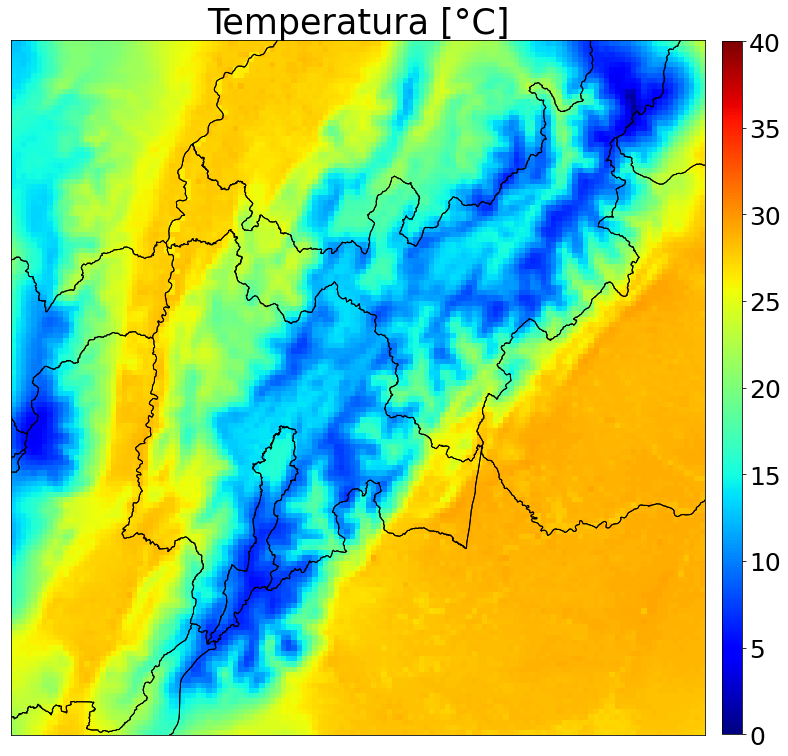

In [ ]:
# Definición de las coordenadas en latitud y longitud para graficar.
m = basemap.Basemap(llcrnrlon= datos.variables['XLONG'][0,0,0],
                    llcrnrlat= datos.variables['XLAT'][0,0,0],
                    urcrnrlon= datos.variables['XLONG'][0,0,-1],
                    urcrnrlat= datos.variables['XLAT'][0,-1,0],
                    projection= 'merc', resolution= 'l')

lons, lats = numpy.meshgrid(datos.variables['XLONG'][0,0,:], datos.variables['XLAT'][0,:,0])
x, y = m(lons, lats)

# Se está definiendo la variable df y se están haciendo los promedios de los datos en el tiempo y convirtiendo a °C.
df = numpy.mean(datos.variables['T2'][0:816,0:132,0:132], axis=0)-273.15
    
# Se define el tamaño de la figura:
fig = matplotlib.pyplot.subplots(figsize=(15,15))

# En esta línea se le dice al código que los datos que va a graficar son los definidos en la variable df. 
# Tambien se define los colores que se usaran cmap = 'jet', jet es la lista de colores que usara. 
# Si quieren cambiar de colores revisar la página: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# En esta línea tambien se definen los rangos desde que valor hasta que valor se graficaran los datos vmin=0 °C y vmax=40°C
m.pcolormesh(x, y, df[0:132,0:132], cmap='jet', vmin=0.0, vmax=40)

# Con estás líneas de comando se define la ubicación y tamaño de la barra de colores
cb = matplotlib.pyplot.colorbar(shrink=0.85, pad=0.02, aspect=35)
# Define el tamaño de los números de la barra de colores
cb.ax.tick_params(labelsize=25)

# Se define el título de la gráfica
matplotlib.pyplot.title("Temperatura [°C]", size = 35)

# Estás line llama el archivo shape con los limites de los departamentos y de Bogotá. 
# Es importante que los tres archivos Colombia_Depart.shp, Colombia_Depart.shx y Colombia_Depart.dbf   estén el la carpeta "data"
m.readshapefile("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/Colombia_Depart", "colombia", drawbounds = True, color= "black", linewidth=1)

# Linea para guardar la imagen en el drive:
# Nombre de la imagen =  Mapa_Temp_D03.png
# Se guardará en la carpeta del drive: /gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/
matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/Mapa_Temp_D03.png", dpi=300, bbox_inches='tight')


# Mapa de Temperatura sobre Bogotá

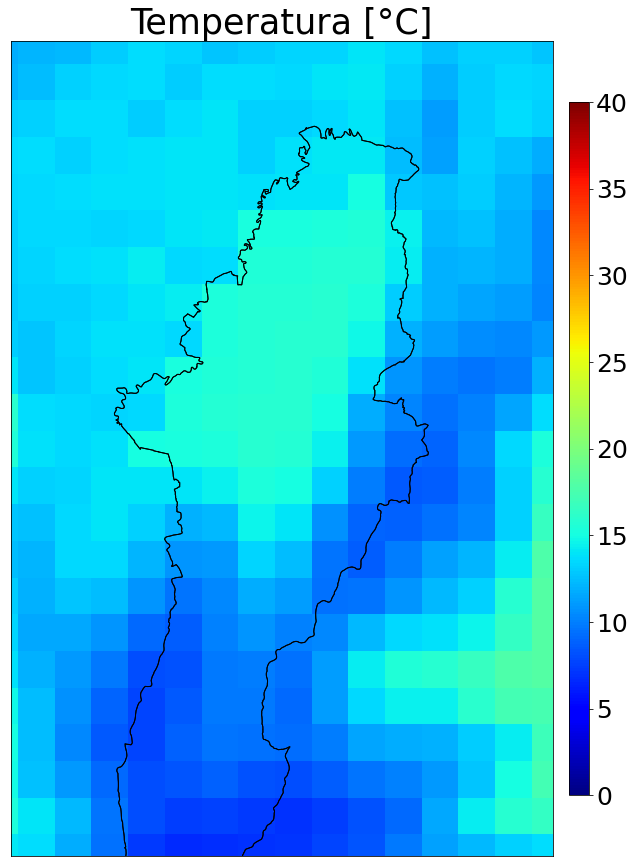

In [ ]:
# Lo unico que cambia de este Script al del anterior renglón son los limites que se graficaran. Arriba se grafico todo el D03 y en este se gráfica unincamente Bogotá.
# Los limites se están definiendo en este renglon.

m = basemap.Basemap(llcrnrlon= -74.3,
                  llcrnrlat= 4.3,
                  urcrnrlon= -73.9,
                  urcrnrlat= 4.9,
                  projection= 'merc',
                  resolution= 'l')

lons, lats = numpy.meshgrid(datos.variables['XLONG'][0,0,:], datos.variables['XLAT'][0,:,0])
x, y = m(lons, lats)

df = numpy.mean(datos.variables['T2'][0:816,0:132,0:132], axis=0)-273.15
    

fig = matplotlib.pyplot.subplots(figsize=(15,15))
m.pcolormesh(x, y, df[0:132,0:132], cmap='jet', vmin=0.0, vmax=40)

cb = matplotlib.pyplot.colorbar(shrink=0.85, pad=0.02, aspect=35)
cb.ax.tick_params(labelsize=25)

matplotlib.pyplot.title("Temperatura [°C]", size = 35)

m.readshapefile("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/Colombia_Depart", "colombia", drawbounds = True, color= "black", linewidth=1)

# Linea para guardar la imagen en el drive:
# Nombre de la imagen =  Mapa_Temp_Bogota.png
# Se guardará en la carpeta del drive: /gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/
matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/Mapa_Temp_Bogota.png", dpi=300, bbox_inches='tight')


# Mapa de Temperatura con la ubicación de las estaciones de monitoreo

Para colocar las estaciones de monitoreo necesitamos saber donde están ubicadas.
La ubicación de las estaciones la encuentran en el archivo de Excel **"EstacionesBogota.xlsx"** en la primera hoja que tiene el archivo que se llama **"Ubic_Estaciones"**.

Para abrir el archivo Excel 

In [ ]:
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo
Estaciones = pandas.read_excel('/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name='Ubic_Estaciones', index_col=False, header=0)
UBI_ESTACIONES = Estaciones.set_index('ESTACIONES')
print(UBI_ESTACIONES)

In [ ]:
#******************************
# Modifique el nombre de la estación tal cual esta en la tabla de excel anterior dentro de las comillas.
nombre_estacion = "Fontibon"
#*****************************

latitud = UBI_ESTACIONES.loc[nombre_estacion]['LATITUD']
longitud = UBI_ESTACIONES.loc[nombre_estacion]['LONGITUD']

print(latitud, longitud)

4.670121 -74.141361


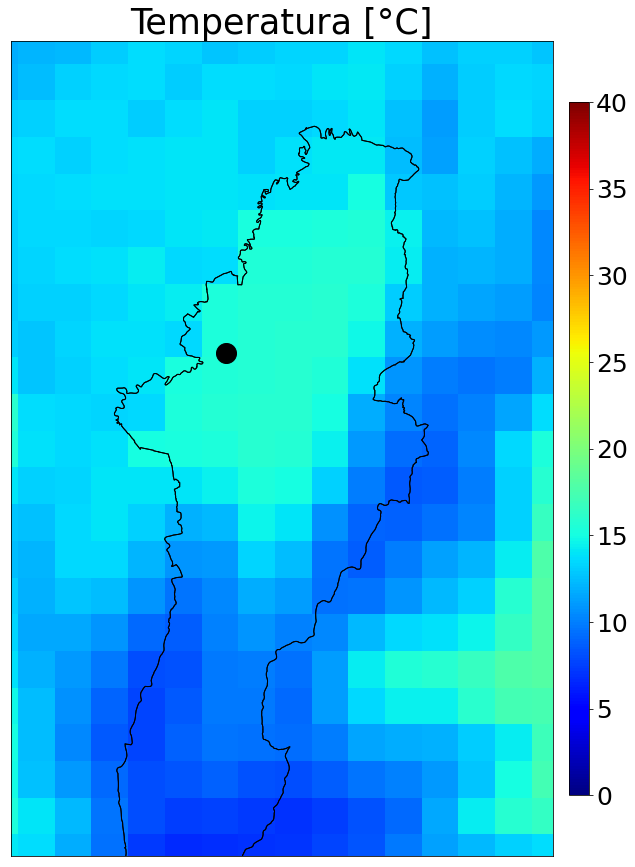

In [ ]:
m = basemap.Basemap(llcrnrlon= -74.3,
                  llcrnrlat= 4.3,
                  urcrnrlon= -73.9,
                  urcrnrlat= 4.9,
                  projection= 'merc',
                  resolution= 'l')

lons, lats = numpy.meshgrid(datos.variables['XLONG'][0,0,:], datos.variables['XLAT'][0,:,0])
x, y = m(lons, lats)

df = numpy.mean(datos.variables['T2'][0:816,0:132,0:132], axis=0)-273.15
    
fig = matplotlib.pyplot.subplots(figsize=(15,15))
m.pcolormesh(x, y, df[0:132,0:132], cmap='jet', vmin=0.0, vmax=40)

cb = matplotlib.pyplot.colorbar(shrink=0.85, pad=0.02, aspect=35)
cb.ax.tick_params(labelsize=25)

matplotlib.pyplot.title("Temperatura [°C]", size = 35)

m.readshapefile("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/Colombia_Depart", "colombia", drawbounds = True, color= "black", linewidth=1)

# La unica diferencia del script anterior son las siguientes dos líenas donde se coloca el punto de ubicación de la estación de monitoreo.
px,py = m(longitud, latitud)
m.plot(px, py, 'o', markersize=20, color ='black')

matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/Mapa_Temp_Bogota_con_Estaciones.png", dpi=300, bbox_inches='tight')
